<a href="https://colab.research.google.com/github/InvincibleChance/InvincibleChance.github.io/blob/main/2_LSTM_model_milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [ ]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

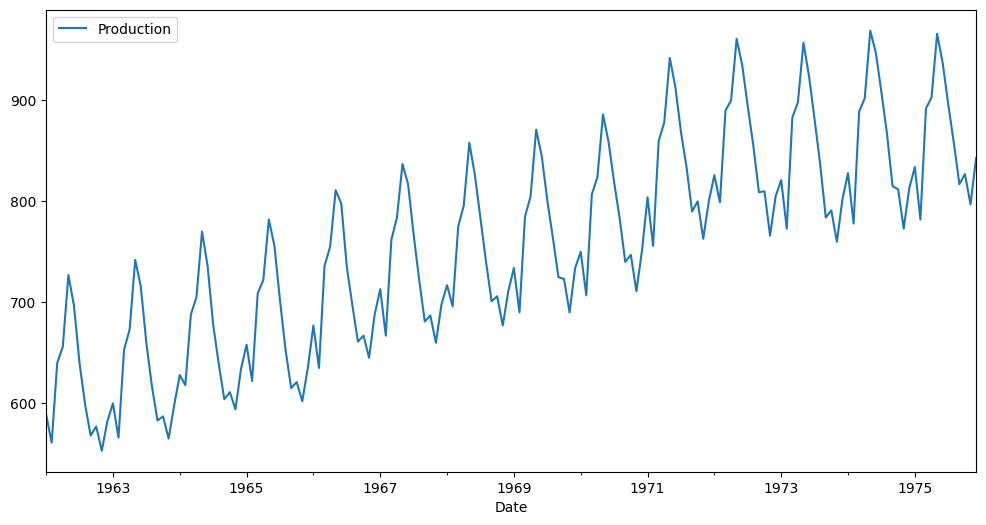

In [ ]:
df.plot(figsize=(12,6))

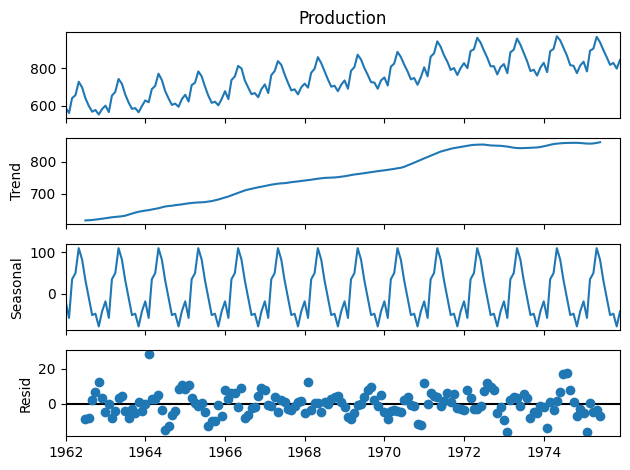

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Production'])
results.plot();

In [ ]:
print(len(df))
train = df.iloc[:156]
test = df.iloc[156:]
print(test)

168
            Production
Date                  
1975-01-01         834
1975-02-01         782
1975-03-01         892
1975-04-01         903
1975-05-01         966
1975-06-01         937
1975-07-01         896
1975-08-01         858
1975-09-01         817
1975-10-01         827
1975-11-01         797
1975-12-01         843


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# здесь нормируем к 1

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 12
# тут предсказываем для 12 месяцев следующий один
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
print(X.shape)

Given the Array: 
[0.08653846 0.01923077 0.20913462 0.24759615 0.41826923 0.34615385
 0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154]
Predict this y: 
 [[0.11298077]]
(1, 12, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
# плотный слой с одним нейроном
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator,epochs=30)

Epoch 1/30
144/144 [==============================] - 3s 8ms/step - loss: 0.0457
Epoch 2/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0214
Epoch 3/30
144/144 [==============================] - 2s 12ms/step - loss: 0.0166
Epoch 4/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0161
Epoch 5/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0074
Epoch 6/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0074
Epoch 7/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0060
Epoch 8/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0073
Epoch 9/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0041
Epoch 10/30
144/144 [==============================] - 1s 8ms/step - loss: 0.0040
Epoch 11/30
144/144 [==============================] - 1s 9ms/step - loss: 0.0063
Epoch 12/30
144/144 [==============================] - 2s 15ms/step - loss: 0.0046
Epoch 13/30
144/144 [==

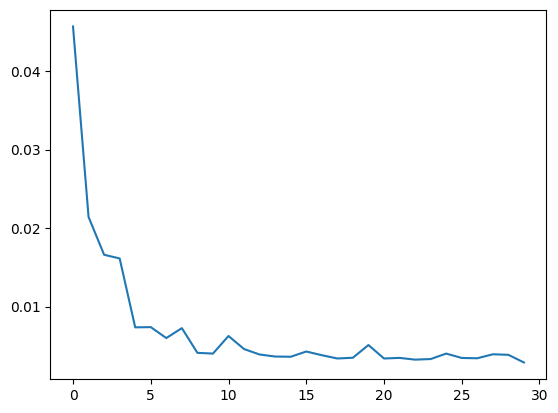

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)
scaled_test[0]


1/1 [==============================] - 0s 32ms/step


array([0.67548077])

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
print(len(test))
for i in range(300):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

12
1/1 [==============================] - 0s 34ms/step


In [ ]:
test_predictions
print(len(test_predictions))

150


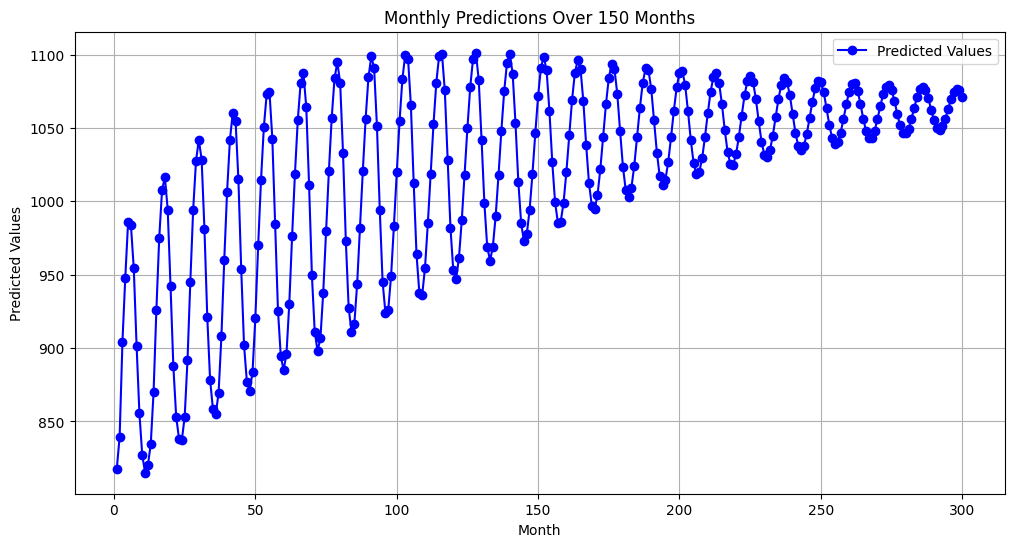

In [ ]:
# test['Predictions'] .plot(figsize=(14,5), color = "blue")
true_predictions = scaler.inverse_transform(test_predictions)
# test['Predictions'] = true_predictions
# print(true_predictions)


import matplotlib.pyplot as plt

# Предположим, что true_predictions - это ваш массив с предсказаниями длиной 150 месяцев
 # Заполните массив вашими данными

# Создание временной шкалы для оси X
months = range(1, 301)  # Представление месяцев от 1 до 150

plt.figure(figsize=(12, 6))  # Установка размера фигуры

# Построение графика
plt.plot(months, true_predictions, label='Predicted Values', color='blue', marker='o')

plt.title('Monthly Predictions Over 150 Months')
plt.xlabel('Month')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.show()


<Axes: xlabel='Date'>

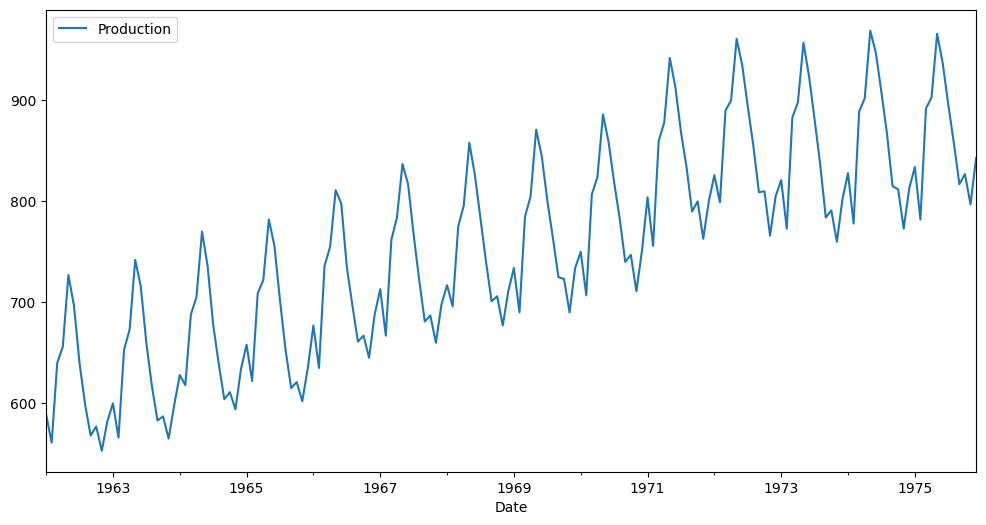

In [ ]:
df.plot(figsize=(12,6))